# What factors made people more likely to survive in Titanic event?

### Background: 
Titanic sank on Apr. 15, 1912 which killed 1502 out of 2224 passengers and crew. This tragedy ask us to think of the safety regulations for ships.  Not enough lifeboats is the main reason. However, under this situation, there are still some groups of people were more likely to survive than others. In this analysis, I would like to investigate what are the factors cause the higher survival rate.  The main focus will be on gender, class level and age.

## 1.Read data：
There are 891 rows and 12 columns in the data set. It includes passenger Id, which class the passenger in, passengers' name, gender, age, ticket number fare, cabin, embarked, parch, sibsp and if the passenger survived.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('titanic-data.csv',index_col = 'PassengerId')
%matplotlib inline

## 2. Data Wrangling:
Before we start analysis, we'd like to check if data had missing values. Since we focus more on how gender, Pclass and Age related to survival rate. We check the missing data for those columns. From below code, we've seen that there are 177 out of 891 users whose ages are unclear, which is 19.87% missing. Thus, when we use Age as factors to do analysis, we will ignore records involve missing values. And also, we also create more descriptive labels so that it is more visuable.

In [3]:
data.describe()
data['Class'] = data.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
data['Survival'] = data.Survived.map({0 : 'Died', 1 : 'Survived'})

## 3. Initial Analysis
First, we will look at the property of some variables, like their proportion and distribution. We plot pie plot including proportion of Gender and Pclasses. From below, we can see that 64.8% passengers are male and 55.1% of passengers stay in third class.

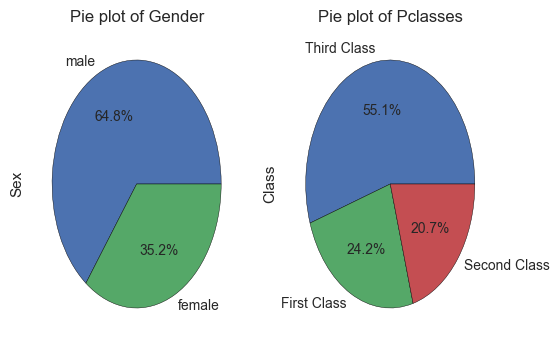

In [4]:
fig, axs = plt.subplots(1,2)
data['Sex'].value_counts().plot('pie',autopct='%1.1f%%',ax = axs[0])
data['Class'].value_counts().plot('pie',autopct='%1.1f%%',ax = axs[1])
axs[1].set_title('Pie plot of Pclasses')
axs[0].set_title('Pie plot of Gender')

Second, we will regard Pclass, Age and Sex as variables and discuss the relationship between survive individually. 

### A. which Pclass had the highest survival rate?

Table of Survival Rate and Pclasses
        Survival Rate
Pclass               
1            0.629630
2            0.472826
3            0.242363


[<matplotlib.text.Text at 0x110e4c190>, <matplotlib.text.Text at 0x110e35390>]

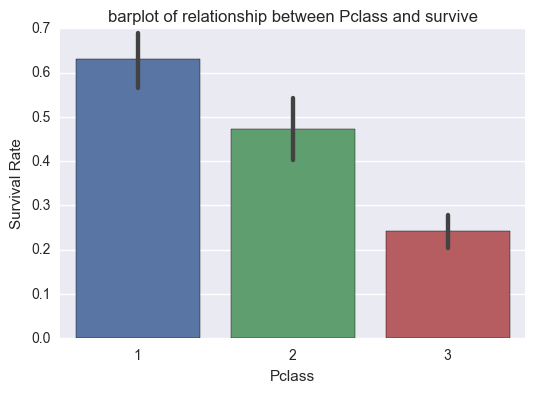

In [5]:
df = data.groupby('Pclass',as_index = False)['Survived'].agg(['mean'])
df.columns = ['Survival Rate']
print ('Table of Survival Rate and Pclasses')
print ('===========================================')
print df
print ('===========================================')
ax = plt.axes()
sns.barplot(x ='Pclass', y = 'Survived',data = data)
ax.set_title('barplot of relationship between Pclass and survive')
ax.set(xlabel='Pclass', ylabel='Survival Rate')

### Code result explanation: 
The result is the percentage of survival rate corresponding to Pclass level. So Class 1 had 62.96% survival rate, Class 2 had 47.28% survival rate and Class 3 had 24.24% of survival rate. From the plot above, it has high probability that better class shows higher survival rate. In order to verify it statistically, we can do a one-way ANOVA test to see if three groups survival rate has significantly difference.
Our null hypothesis is all classes had same survival rate and alternative hypothesis is at least one Class's survival rate is different from others. Here since the Pclasses are categorical data, we will use chi-squared test.

$H_0$: Pclasses have no effect on Survival

$H_1$: Pclasses have effect on Survival

We can choose $alpha$ = 0.05 as significant level

In [6]:
# Chi-Squared Tests
from scipy.stats import chi2_contingency
# Pclass to Survivability
pivot = pd.pivot_table(data = data[['Survival', 'Class']], index = 'Survival', columns = ['Class'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = chi2_contingency(pivot)
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)

Class     First Class  Second Class  Third Class
Survival                                        
Died               80            97          372
Survived          136            87          119 

Chi-Squared Score = 102.888988757
Pvalue = 4.5492517113e-23


We can see from above result that p-value = $4.55e^-23$, which is much smaller than 0.05. Thus, we reject null. This chi-squared test told us that Pclasses significantly effect survival. 

### B. If male or female easy to survive?

[<matplotlib.text.Text at 0x110f24350>, <matplotlib.text.Text at 0x10cc45a90>]

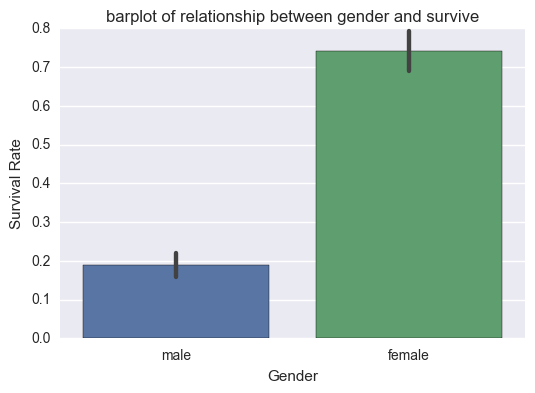

In [7]:
ax = plt.axes()
sns.barplot(x ='Sex', y = 'Survived',data = data)
ax.set_title('barplot of relationship between gender and survive')
ax.set(xlabel='Gender', ylabel='Survival Rate')

### Code result explanation: 
From the Bar plot, it shows a huge different from Male and Female. We can do a two-sample t test to see if the average survived, which is survival rate has significantly difference. Here we use chi-squared test.

Null Hypothesis: If gender had no effect for survival rate. Alternative Hypothesis: gender had effect for survival rate

$H_0$: Survival rate of female = Survival rate of male

$H_1$: Survival rate of female $!=$ Survival rate of male

We can choose $alpha$ = 0.5 as significant level

In [8]:
# Chi-Squared Tests
from scipy.stats import chi2_contingency
# Pclass to Survivability
pivot = pd.pivot_table(data = data[['Survival', 'Sex']], index = 'Survival', columns = ['Sex'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = chi2_contingency(pivot)
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)

Sex       female  male
Survival              
Died          81   468
Survived     233   109 

Chi-Squared Score = 260.717020167
Pvalue = 1.19735706278e-58


P value here is $1.19e^-58$, which is much smaller than 0.5. Thus, we reject the null. In this case, we found gender also show very strong signal that had relationship to survival rate.

### C.  How's age related to survival rate?




In [9]:
print ("minum age:", min(data['Age']))
print ("maximum age:", max(data['Age']))

('minum age:', 0.41999999999999998)
('maximum age:', 80.0)


From above, we see the minimum age is 4 month and the maximum age is 80 years old. We will offer 2 bins to classfiy passengers to be children or adult. Since we suspect that children might had higher survival rate. 

Children: <= 18 years old

Adult: > 18 years old



In [10]:
def age_classify(value):
    if value:
        if value <= 18:
            return 'Children'
        else:
            return 'Adult'
data['Adult/Children'] = data['Age'].map(age_classify)

[<matplotlib.text.Text at 0x10ede4310>, <matplotlib.text.Text at 0x10c2e6550>]

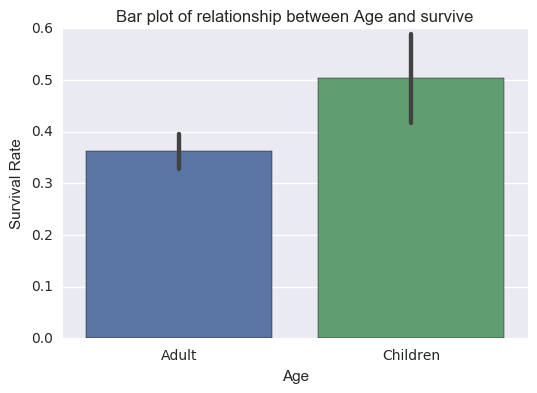

In [64]:
ax = plt.axes()
sns.barplot(x ='Adult/Children', y = 'Survived',data = data)
ax.set_title('Bar plot of relationship between Age and survive')
ax.set(xlabel='Age', ylabel='Survival Rate')

From above, we observed that children seems had the higher survival rate. In order to statistically validate the conclusion, we will do a chi-squared test.
The null hypothesis is no difference of survival rate between adult and children. The alternative hypothesis is there is difference between adult and children.

$H_0$: Survival rate of Adult = Survival rate of Children

$H_1$: Survival rate of Adult $!=$ Survival rate of Children

We choose $alpha$ = 0.05 as significant level.

In [11]:
# Chi-Squared Tests
from scipy.stats import chi2_contingency
# Pclass to Survivability
pivot = pd.pivot_table(data = data[['Survival', 'Adult/Children']], index = 'Survival', columns = ['Adult/Children'], aggfunc = len)
pivot
print pivot,"\n"
chi2, p_value, dof, expected = chi2_contingency(pivot)
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)

Adult/Children  Adult  Children
Survival                       
Died              480        69
Survived          272        70 

Chi-Squared Score = 9.39630083367
Pvalue = 0.00217423681057


We can see the P-value is 0.002, which is smaller than 0.05. Thus, we reject the null. We are seeing children had higher survival rate.

### Summary from the Initial Analysis:
#### As we discussed above, we found that female, top class and children had higher survival rate. We would like to understand deeper. Interesting questions can be: 
#### a) If Adult male had even lower survival rate? 
#### b)Are they single or married? 
#### c)What about their spouse/children live status?

## 4. Further Analysis
In this section, we will look deeper about the dependency of the different factors and how they related to survival rate so that answer above interesting questions.

### a) Adult male had lower survival rate?

[<matplotlib.text.Text at 0x111357310>, <matplotlib.text.Text at 0x111330750>]

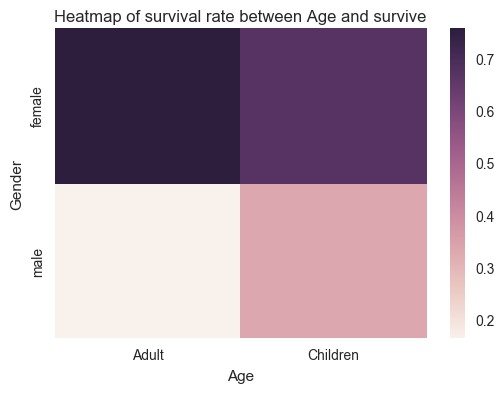

In [13]:
flight = data.groupby(['Sex','Adult/Children'],as_index = False).mean()[['Sex','Adult/Children','Survived']]
flight = flight.pivot(index = "Sex", columns = "Adult/Children", values = "Survived")
flight
ax = plt.axes()
sns.heatmap(flight)
ax.set_title('Heatmap of survival rate between Age and survive')
ax.set(xlabel='Age', ylabel='Gender')

### Code result explanation: 
From above heatmap, we can see adult male had lower survival rate compare to children male. This is very interesting phenomenon. We would like to see deeper and categorize adult male to different group to see their different behaviors. 

### 1. b) Are they (adult male) single or married? c)What about their spouse/children live status?

In order to answer question, we would like to recoganize if the adult had married or not. We can recoganize this from their Tickets combine with gender and age. We observed that usually family share the same ticket and cabin. We can use their last name to verify. If we see users use same ticket, we assume they come together. If they had same last name, we can treat them as family. One step further, if they are children, we label them as 'Baby'. Otherwise, based on their gender, we label them as 'Wife' or 'Husband'.

In [76]:
from collections import defaultdict
##get same ticket
def same_ticket(seq):
    tally = defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i)
    return {key:locs for key,locs in tally.items() 
                            if len(locs)>1}
same_ticket_list = same_ticket(data['Ticket'])
##parse family name
def family_name(value):
    return value.split(',')[0]
data['Family_Name'] = data['Name'].apply(family_name)

In [77]:
##check family or not and clarify the roles
def family(seq):
    if seq['Ticket'] in same_ticket_list:
        if seq['Adult/Children'] == 'Children': 
            return 'Baby'
        elif seq['Sex'] == 'female':
            return 'wife'
        else:
            return 'husband'
    else:
        return 'single'
data['Family'] = [family(row) for i, row in data.iterrows()]

Now, we had family information of passengers. We can check if low survival rate of adult male is related to marriage.

[<matplotlib.text.Text at 0x112911d50>, <matplotlib.text.Text at 0x1128fae10>]

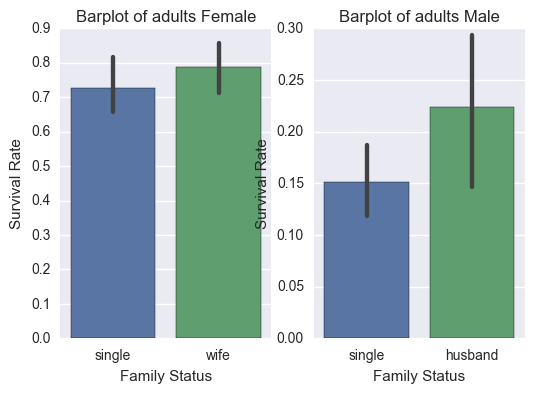

In [78]:
fig, axs = plt.subplots(1,2)
sns.barplot(x ='Family', y = 'Survived',data = data[(data['Sex'] == 'female') & (data['Adult/Children'] == 'Adult')],ax = axs[0])
sns.barplot(x ='Family', y = 'Survived',data = data[(data['Sex'] == 'male') & (data['Adult/Children'] == 'Adult')],ax = axs[1])
axs[0].set_title('Barplot of adults Female')
axs[1].set_title('Barplot of adults Male')
axs[0].set(xlabel='Family Status', ylabel='Survival Rate')
axs[1].set(xlabel='Family Status', ylabel='Survival Rate')

From Above bar plot, we can see that husbands' survival rate is higher than single males. We can use chi-squared test to see if it is statistically significant.
Null Hypothesis is single male survival rate is equal to male accompanied with family. Alternative hypothesis is survival rates are different between single males and males with family.

$H_0$: survival rate of single male = survival rate of husbands.

$H_1$: survival rate of single male $!=$ survival rate of husbands.

We choose $alpha$ = 0.05 as significant level.

In [81]:
##wi
family_male = data[(data['Adult/Children'] == 'Adult') &(data['Sex'] == 'male') & (data['Family'] != 'single')]["Survived"]
single_male = data[(data['Adult/Children'] == 'Adult') &(data['Sex'] == 'male') & (data['Family'] == 'single')]["Survived"]
# Chi-Squared Tests
from scipy.stats import chi2_contingency
# Pclass to Survivability
pivot = pd.pivot_table(data = data[(data['Adult/Children'] == 'Adult') &(data['Sex'] == 'male')][['Survival', 'Family']], index = 'Survival', columns = ['Family'], aggfunc = len)
pivot
print pivot,"\n"
print "Adult Male survival effect from family chi-squared test:" 
chi2, p_value, dof, expected = chi2_contingency(pivot)
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)

Family    husband  single
Survival                 
Died           90     331
Survived       26      59 

Adult Male survival effect from family chi-squared test:
Chi-Squared Score = 2.89421509143
Pvalue = 0.088898064475


From the test, we can see P-value is 0.09, which is higher than significant level. Thus, we fail to reject the null hypothesis. We cannot claim that adult male high survival rate is coming from family factor. However, it is very close to the siginificant level. Still, we want to see if survival rate of husband accompanied with wife has different from survival rate of husband accompanied with children.

[<matplotlib.text.Text at 0x112d2de50>, <matplotlib.text.Text at 0x112b8be90>]

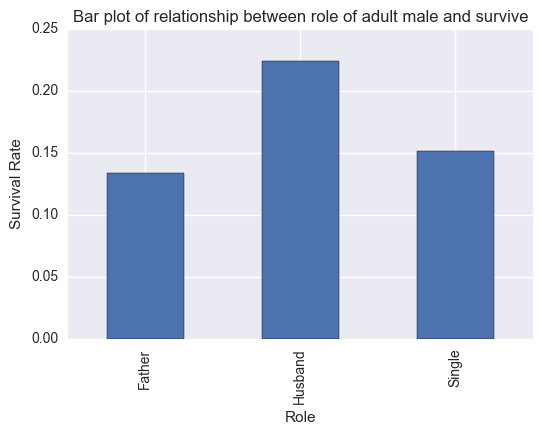

In [84]:
def find_husband(val):
    return val in [item for i, item in enumerate(data[data['Family'] == 'wife']['Ticket'])]
def find_father(val):
    return val in [item for i, item in enumerate(data[data['Family'] == 'Baby']['Ticket'])]
adult_male = {}
adult_male['Husband'] = data[(data['Ticket'].map(find_husband)) & (data['Family'] == 'husband')]['Survived']
adult_male['Father'] = data[(data['Ticket'].map(find_father)) & (data['Family'] == 'husband')]['Survived']
adult_male['Single'] = data[(data['Family'] == 'single') & (data['Sex'] == 'male') & (data['Adult/Children'] == 'Adult')]['Survived']
df = pd.DataFrame(data=adult_male)
ax = plt.axes()
df.mean().plot('bar')
ax.set_title('Bar plot of relationship between role of adult male and survive')
ax.set(xlabel='Role', ylabel='Survival Rate')

From above bar plot, it is interesting that we found adult male together with wives had the highest survival rate but with children had the lowest survival rate. 

# Conlcusion

## We observed that for some groups of users, they had significant higher survival rate, like female group, children group, top class group. Though there is no statistical significance to prove, we still observed two interesting phenomenon:

### 1. Adult male with family had higher survival rate than single adult male.

### 2. Adult male with wives had higher survival rate than those with children.

## The limit of this analysis is the sample number is: 

### 1. small and when we breakdown deeper, the sample number is even smaller. Thus, it is hardly draw significant conclusions many times. 

### 2. we simply ignore the record has missing value. However, it is actually a 20% missing, which should be taken care of properly. This will also help the sample size.

### 3. The data probably bias since the survey is done after the event. Thus, more survived passengers. It is hard to survey a dead person.
